In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.corr().style.background_gradient(cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe().style.background_gradient(cmap='coolwarm')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.shape

(200, 4)

<AxesSubplot:xlabel='Sales', ylabel='TV'>

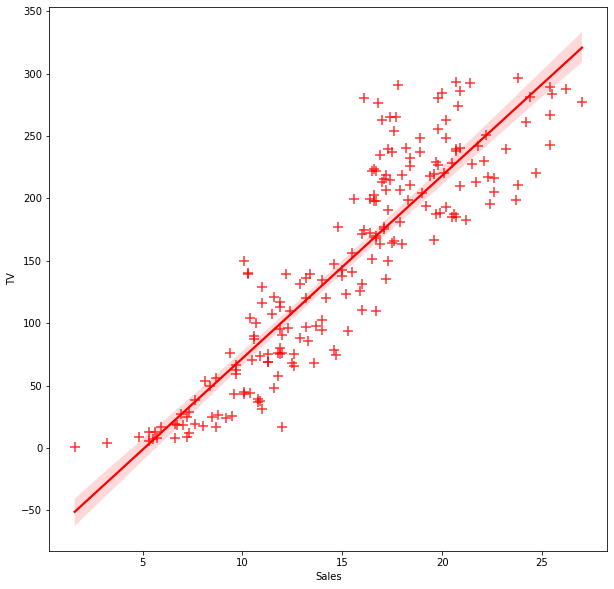

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(x='Sales', y='TV', data=df, fit_reg=True, marker='+', scatter_kws={'s':100}, color='red')

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)

In [25]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

#train the model
LR_model.fit(x_train, y_train)

# theta0 and theta1 koeffisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f'theta1 = {theta1}')
print(f'theta0 = {theta0}')

theta1 = 0.056439836052706624
theta0 = 6.819034628470243


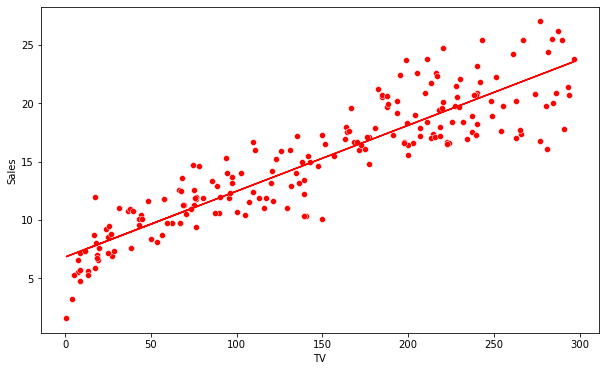

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales', color='red')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [29]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [31]:
y_predict = LR_model.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'MSE = {mean_squared_error(y_test, y_predict)}')
print(f'MAE = {mean_absolute_error(y_test, y_predict)}')

MSE = 5.304256414232314
MAE = 1.9042820838267638
